In [55]:
import numpy as np
import matplotlib.pyplot as plt
# Load data
n_claims, total_payment = np.loadtxt("../insurance.csv", skiprows=1, unpack=True, delimiter=',')
data = np.column_stack((n_claims, total_payment))
print(data.shape)

(63, 2)


In [56]:
# Prepare data for training and testing
N_OBS = int(data.shape[0] * 0.8)
print(N_OBS)
training_set = data[:N_OBS]
test_set = data[N_OBS:]

inputs = np.reshape(training_set[:, 0], (N_OBS,1))
print(inputs.shape)

targets = np.reshape(training_set[:, 1], (N_OBS, 1))
print(targets.shape)

50
(50, 1)
(50, 1)


[[0.09796149]] [[-0.08142345]]


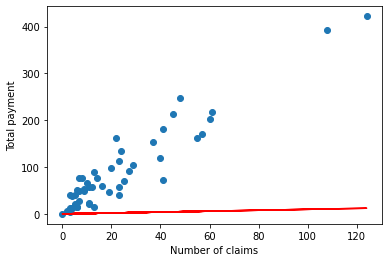

In [57]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(1, 1))
bias = np.random.uniform(-init_range, init_range, size=(1, 1))

print(weights, bias)
initial_output = np.dot(inputs, weights) + bias
# Plot data
plt.scatter(inputs, targets)
plt.plot(inputs, initial_output, color='red')
plt.xlabel("Number of claims")
plt.ylabel("Total payment")
plt.show()

In [60]:
LEARNING_RATE = 0.00001
EPOCHS = 500
for i in range(EPOCHS):
    outputs = np.dot(inputs, weights) + bias
    deltas = outputs - targets

    loss = np.sum(deltas ** 2) / (1000 * N_OBS)
    if i % 10 == 0:
        print('epoch', i, 'loss:', loss)

    weights = weights - LEARNING_RATE * np.dot(inputs.T, deltas / N_OBS)
    bias = bias - LEARNING_RATE * np.sum(deltas / N_OBS)

epoch 0 loss: 0.9611525794128468
epoch 10 loss: 0.9611210681424094
epoch 20 loss: 0.9610941598292321
epoch 30 loss: 0.9610708830261683
epoch 40 loss: 0.9610504713553782
epoch 50 loss: 0.9610323202188653
epoch 60 loss: 0.9610159526472783
epoch 70 loss: 0.9610009923579201
epoch 80 loss: 0.9609871425001222
epoch 90 loss: 0.9609741688874013
epoch 100 loss: 0.9609618867692552
epoch 110 loss: 0.9609501503953872
epoch 120 loss: 0.96093884478289
epoch 130 loss: 0.9609278792213491
epoch 140 loss: 0.960917182149
epoch 150 loss: 0.9609066971105091
epoch 160 loss: 0.9608963795680567
epoch 170 loss: 0.9608861943855869
epoch 180 loss: 0.9608761138441273
epoch 190 loss: 0.9608661160760664
epoch 200 loss: 0.9608561838299503
epoch 210 loss: 0.9608463034960262
epoch 220 loss: 0.9608364643374928
epoch 230 loss: 0.9608266578840273
epoch 240 loss: 0.9608168774533423
epoch 250 loss: 0.9608071177737333
epoch 260 loss: 0.960797374686313
epoch 270 loss: 0.9607876449100973
epoch 280 loss: 0.9607779258566824
epo

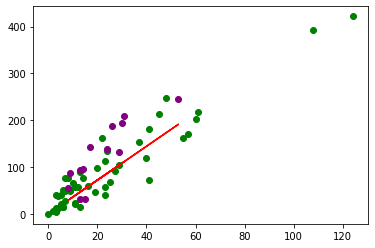

In [61]:
# Run model on test set
test_inputs = np.reshape(test_set[:, 0], (test_set.shape[0], 1))
test_targets = np.reshape(test_set[:, 1], (test_set.shape[0], 1))
test_outputs = np.dot(test_inputs, weights) + bias
# Plot results
plt.scatter(inputs, targets, color='green')
plt.scatter(test_inputs, test_targets, color='purple')
plt.plot(test_inputs, test_outputs, color='red')
plt.show()

In [63]:
mse = np.sum((test_outputs - test_targets) ** 2) / (1000 * test_set.shape[0])
print(mse)

3.6246492816737512
